In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('seaborn')

In [40]:
df = pd.read_csv("./Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
newdata = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
newdata

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


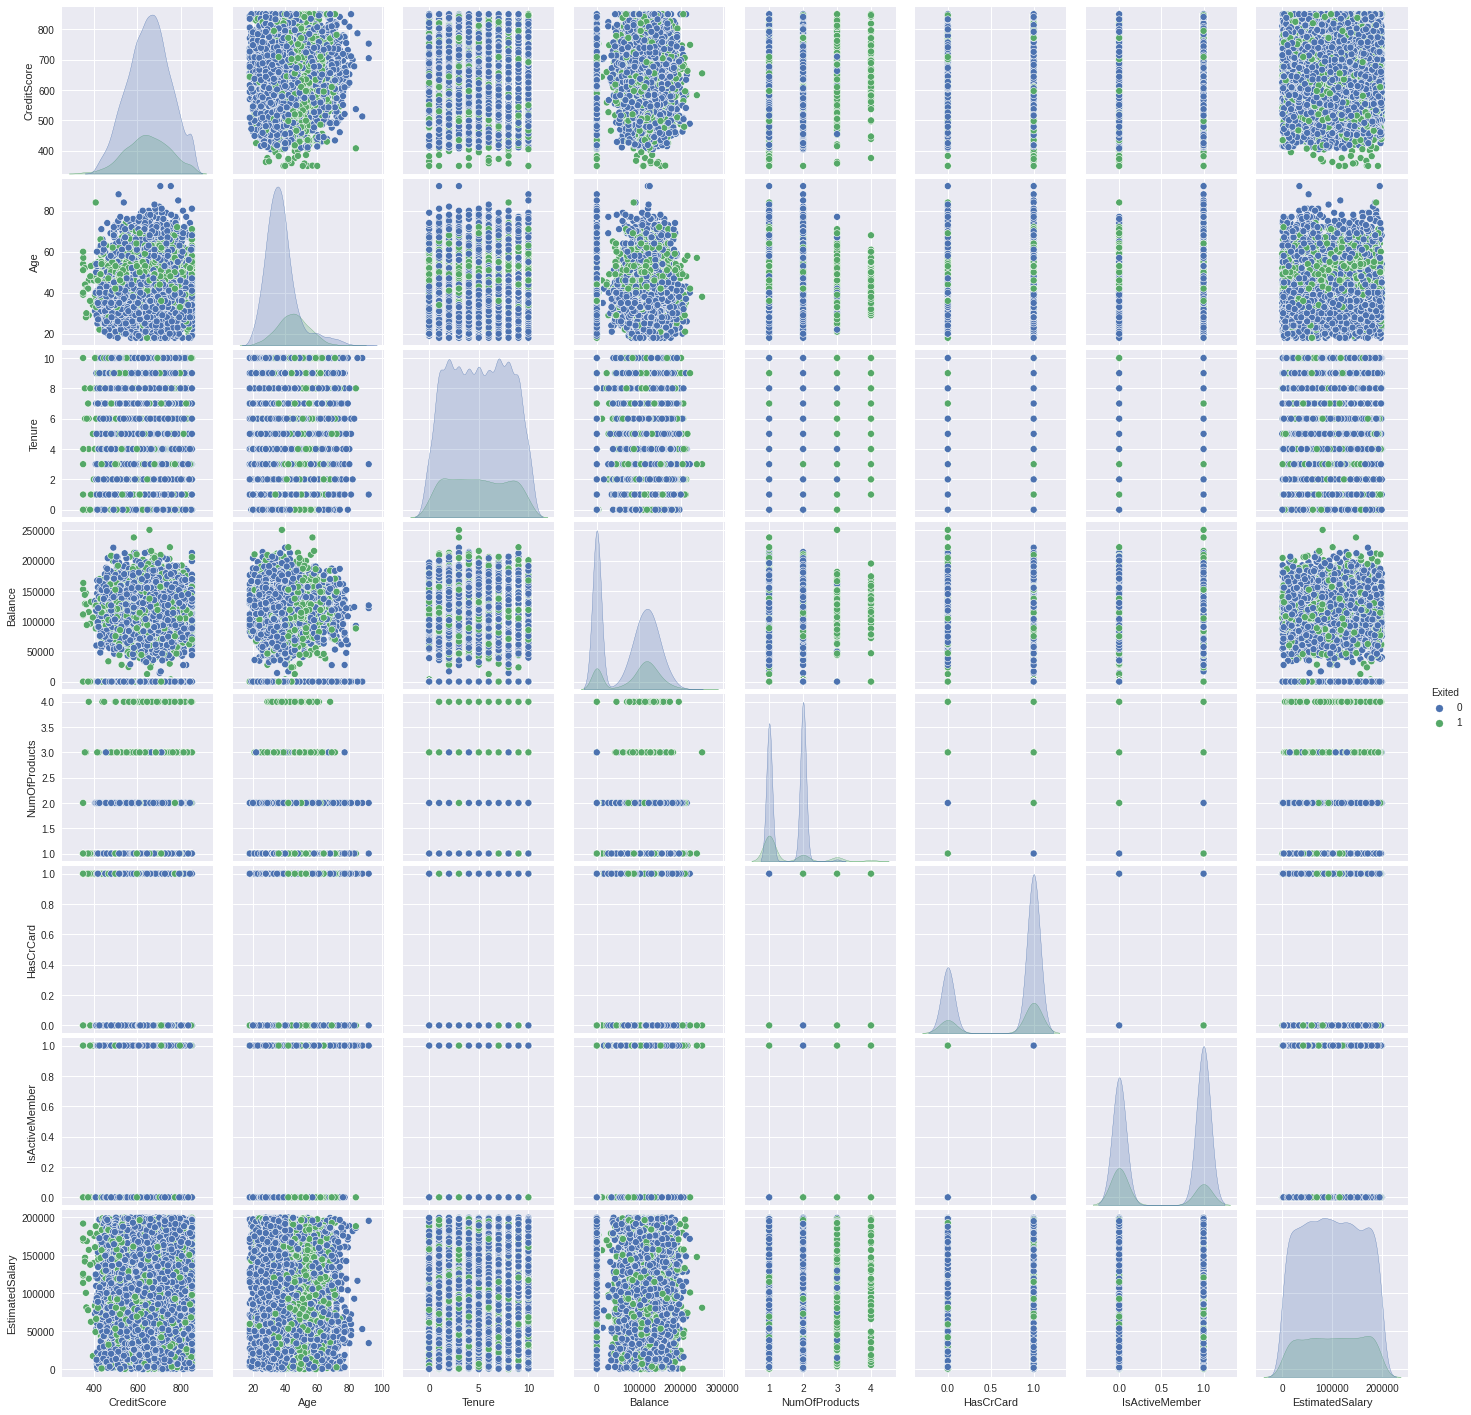

In [42]:
sns.pairplot(newdata, hue='Exited')

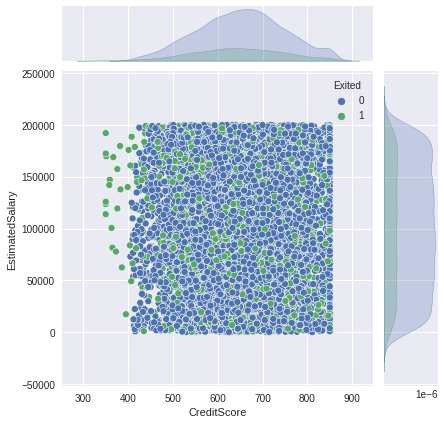

In [43]:
sns.jointplot(data= df,x= 'CreditScore', y = 'EstimatedSalary', hue= 'Exited')

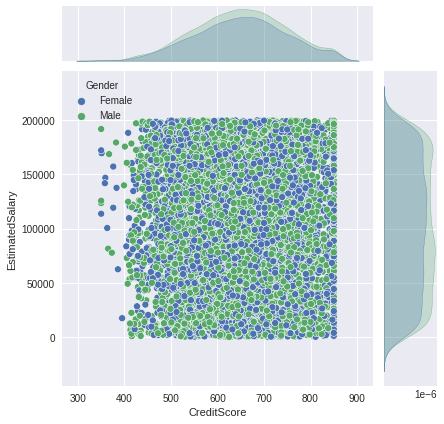

In [44]:
sns.jointplot(data= df,x= 'CreditScore', y = 'EstimatedSalary', hue= 'Gender')

<AxesSubplot:xlabel='Gender', ylabel='count'>

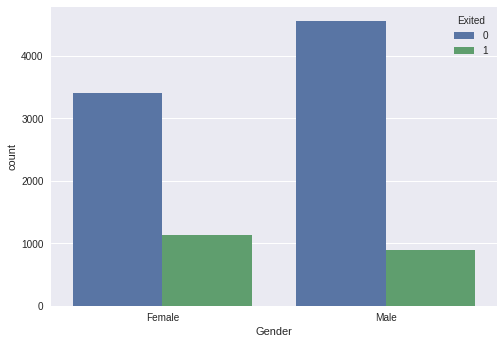

In [45]:
sns.countplot(data=df, x ='Gender', hue = 'Exited' )

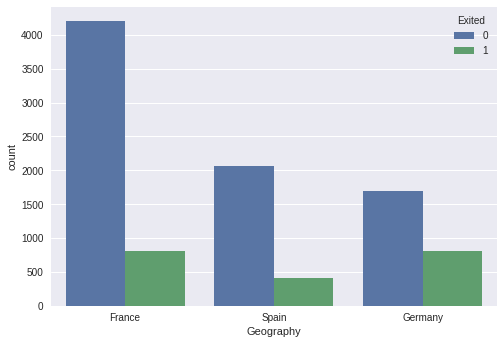

In [46]:
sns.countplot(data=df, x ='Geography', hue = 'Exited' )
plt.show()

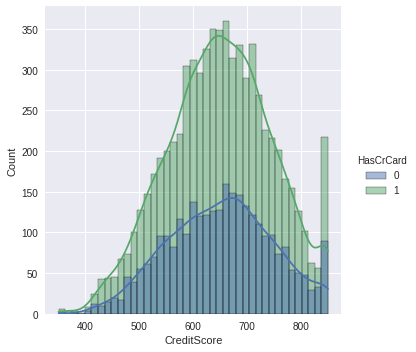

In [47]:
sns.displot(data= df, x = 'CreditScore', hue = 'HasCrCard', kde = True)

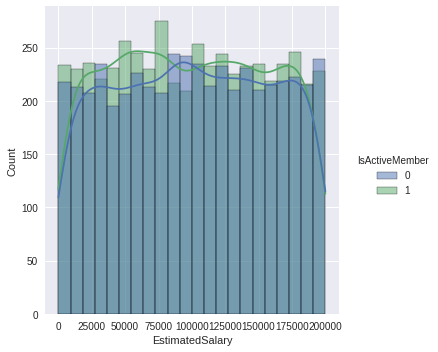

In [48]:
sns.displot(data= df, x = 'EstimatedSalary', hue = 'IsActiveMember', kde = True)

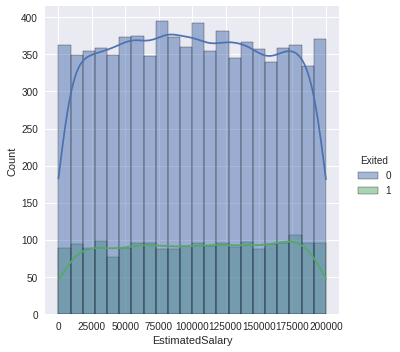

In [49]:
sns.displot(data= df, x = 'EstimatedSalary', hue = 'Exited', kde = True)

In [50]:
cm = newdata.corr()
abs(cm)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.003965,0.000842,0.006268,0.012238,0.005458,0.025651,0.001384,0.027094
Age,0.003965,1.000000,0.009997,0.028308,0.030680,0.011721,0.085472,0.007201,0.285323
Tenure,0.000842,0.009997,1.000000,0.012254,0.013444,0.022583,0.028362,0.007784,0.014001
Balance,0.006268,0.028308,0.012254,1.000000,0.304180,0.014858,0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.030680,0.013444,0.304180,1.000000,0.003183,0.009612,0.014204,0.047820
HasCrCard,0.005458,0.011721,0.022583,0.014858,0.003183,1.000000,0.011866,0.009933,0.007138
IsActiveMember,0.025651,0.085472,0.028362,0.010084,0.009612,0.011866,1.000000,0.011421,0.156128
EstimatedSalary,0.001384,0.007201,0.007784,0.012797,0.014204,0.009933,0.011421,1.000000,0.012097
Exited,0.027094,0.285323,0.014001,0.118533,0.047820,0.007138,0.156128,0.012097,1.000000


<AxesSubplot:>

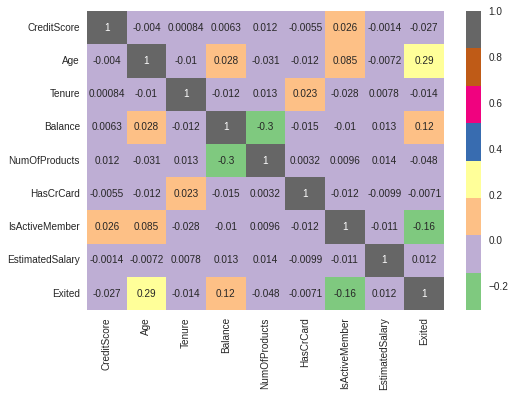

In [55]:
sns.heatmap(cm, cmap= 'Accent', annot= True)

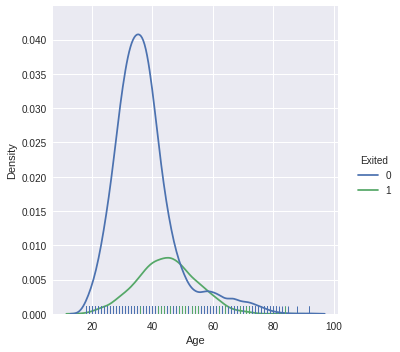

In [52]:
sns.displot(data=df, x = 'Age', hue= 'Exited', rug = True, kind = 'kde')

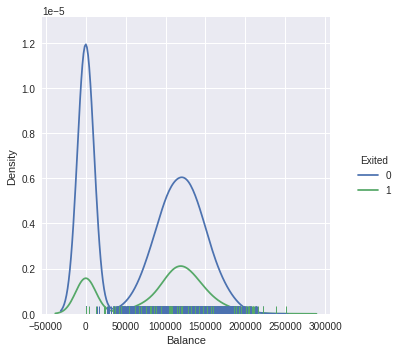

In [54]:
sns.displot(data=df, x = 'Balance', hue= 'Exited', rug = True, kind = 'kde')

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

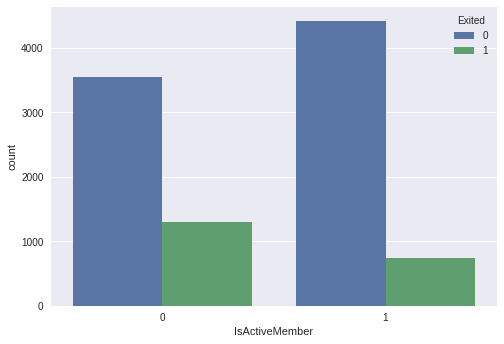

In [57]:
sns.countplot(data=df, x='IsActiveMember', hue= 'Exited')

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
l1 = LabelEncoder()
l2 = LabelEncoder()

In [63]:
newdata['Geography'] = l1.fit_transform(newdata["Geography"])

In [64]:
newdata['Gender'] = l2.fit_transform(newdata["Gender"])
newdata

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [68]:
X = newdata.drop(['Exited'], axis=1)
Y = newdata['Exited']
X, Y

(      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
 0             619          0       0   42       2       0.00              1   
 1             608          2       0   41       1   83807.86              1   
 2             502          0       0   42       8  159660.80              3   
 3             699          0       0   39       1       0.00              2   
 4             850          2       0   43       2  125510.82              1   
 ...           ...        ...     ...  ...     ...        ...            ...   
 9995          771          0       1   39       5       0.00              2   
 9996          516          0       1   35      10   57369.61              1   
 9997          709          0       0   36       7       0.00              1   
 9998          772          1       1   42       3   75075.31              2   
 9999          792          0       0   28       4  130142.79              1   
 
       HasCrCard  IsActiveMember  Esti

In [65]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=10)

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [85]:
model = RandomForestClassifier(n_estimators=500, criterion='entropy')
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.854

In [82]:
RandomForestClassifier?

In [86]:
from xgboost import XGBClassifier

In [87]:
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [89]:
def evaluate_model(model):
    print(f"Training Accuracy: {model.score(X_train, Y_train)}")
    print(f"Testing Accuracy: {model.score(X_test, Y_test)}")    
    
    ypred = model.predict(X_test)
    print(confusion_matrix(Y_test, ypred))
    print(f"F1 score: {f1_score(Y_test, ypred)}")
    print(classification_report(Y_test, ypred))

In [90]:
evaluate_model(model)

Training Accuracy: 0.95825
Testing Accuracy: 0.847
[[1492   86]
 [ 220  202]]
F1 score: 0.5690140845070423
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1578
           1       0.70      0.48      0.57       422

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [91]:
from sklearn.model_selection import GridSearchCV

In [94]:
xgb_params = {
    'n_estimators' : [100,300],
    'max_depth' : [3,5]
}

grid = GridSearchCV(XGBClassifier(), param_grid= xgb_params, scoring='accuracy', cv= 10)
grid.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [3, 5], 'n_estimators': [100, 300]},
             scoring='accuracy')

In [95]:
grid.best_score_

0.8641249999999999

In [96]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [98]:
model = XGBClassifier(n_estimators = 100, max_depth = 3)
model.fit(X_train, Y_train)

evaluate_model(model)

Training Accuracy: 0.887625
Testing Accuracy: 0.8615
[[1519   59]
 [ 218  204]]
F1 score: 0.5956204379562045
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1578
           1       0.78      0.48      0.60       422

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.85      0.86      0.85      2000

